PCA

Trực giao:
    + x = U*y, xét U là ma trận trực giao  
    + y = U^-1 * x, nếu U trực giao U * U^-1 =  hay  U^-1 = U^t  
    + y = U^t * x  

Trace: 
    + đối với ma trận vuông, giá trị bằng tổng của đường chéo  
    + trace(A) = tổng của giá trị riêng (ghi đa thức đặc trưng là thấy)  

Ma trận hiệp phương sai:
    + đối xứng, các giá trị trên đường chéo chính là phương sai của từng chiều dữ liệu  
    + i # j thể hiện hiệp phương sai của các thành phần tương ứng  
    + nửa xác định dương (X^t * A * X >= 0 với mọi X), tương ứng các giá trị riêng >= 0  

Lưu ý:
    + Phép nhân một ma trận với ma trận trực chuẩn không làm thay đổi độ dài (chuẩn) của ma trận ban đầu.  
    



# Load data

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['label'] = iris.target

df.head()




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# PCA

In [54]:
x_mean = df.iloc[:, :-1].mean()
x_std = df.iloc[:, :-1].std()
df.iloc[:, :-1] = (df.iloc[:, :-1] - x_mean) / x_std

In [71]:
import numpy as np
X_hat = df.iloc[:, :-1]
X_hat

# số phần tử
n = X_hat.shape[0]

# ma trận hiệp phương sai
S = np.dot(X_hat.T, X_hat) / n

# giá trị riêng và vector riêng
# eigenvectors, eigenvalues, u = np.linalg.svd(S)
eigenvalues, eigenvectors = np.linalg.eig(S)

# chọn k giá trị riêng lớn nhất
k = 2
sort_index = np.argsort(eigenvalues)[::-1]
k_index = sort_index[:k]

# vector riêng tương ứng với k giá trị riêng lớn nhất
eigenvectors = eigenvectors[:, k_index]
eigenvectors

# chiếu dữ liệu vào không gian mới
Z = np.dot(X_hat, eigenvectors)
Z 


array([[-2.25714118, -0.47842383],
       [-2.07401302,  0.67188269],
       [-2.35633511,  0.34076642],
       [-2.29170679,  0.59539986],
       [-2.3818627 , -0.64467566],
       [-2.06870061, -1.4842053 ],
       [-2.43586845, -0.04748512],
       [-2.22539189, -0.222403  ],
       [-2.32684533,  1.1116037 ],
       [-2.17703491,  0.46744757],
       [-2.15907699, -1.04020587],
       [-2.31836413, -0.132634  ],
       [-2.2110437 ,  0.72624318],
       [-2.62430902,  0.95829635],
       [-2.19139921, -1.85384655],
       [-2.25466121, -2.67731523],
       [-2.20021676, -1.47865573],
       [-2.18303613, -0.48720613],
       [-1.89223284, -1.40032757],
       [-2.33554476, -1.1240836 ],
       [-1.90793125, -0.40749058],
       [-2.19964383, -0.92103587],
       [-2.76508142, -0.4568133 ],
       [-1.81259716, -0.08527285],
       [-2.21972701, -0.13679618],
       [-1.9453293 ,  0.62352971],
       [-2.04430277, -0.24135499],
       [-2.1613365 , -0.52538942],
       [-2.13241965,

Text(0.5, 1.0, 'Explained Variance')

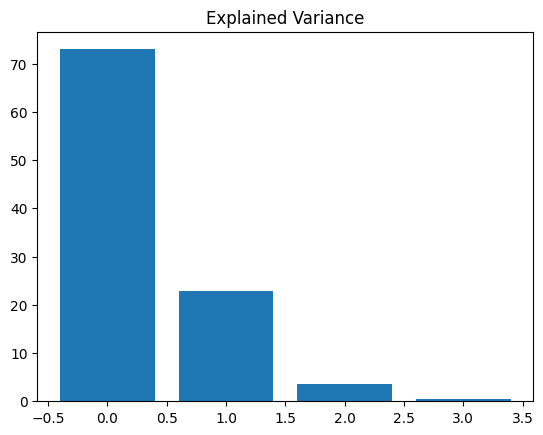

In [76]:
explained_variance = 100 * (eigenvalues / np.sum(eigenvalues))
plt.bar(range(4), explained_variance)
plt.title('Explained Variance')

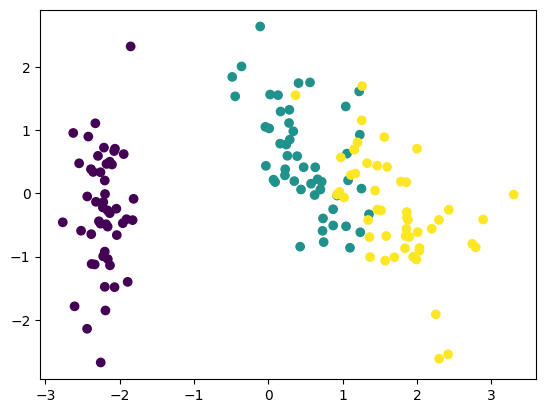

In [56]:
import matplotlib.pyplot as plt

plt.scatter(Z[:, 0], Z[:, 1], c=df['label'], cmap='viridis')

# Thư viện sklearn

In [80]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_hat)

X_pca = pca.transform(X_hat)
X_pca

array([[-2.25714118e+00,  4.78423832e-01,  1.27279624e-01,
        -2.40875085e-02],
       [-2.07401302e+00, -6.71882687e-01,  2.33825517e-01,
        -1.02662845e-01],
       [-2.35633511e+00, -3.40766425e-01, -4.40539002e-02,
        -2.82823051e-02],
       [-2.29170679e+00, -5.95399863e-01, -9.09852971e-02,
         6.57353401e-02],
       [-2.38186270e+00,  6.44675659e-01, -1.56856473e-02,
         3.58028703e-02],
       [-2.06870061e+00,  1.48420530e+00, -2.68782498e-02,
        -6.58611612e-03],
       [-2.43586845e+00,  4.74851181e-02, -3.34350297e-01,
         3.66527670e-02],
       [-2.22539189e+00,  2.22403002e-01,  8.83993519e-02,
         2.45299187e-02],
       [-2.32684533e+00, -1.11160370e+00, -1.44592465e-01,
         2.67695403e-02],
       [-2.17703491e+00, -4.67447569e-01,  2.52918268e-01,
         3.97660677e-02],
       [-2.15907699e+00,  1.04020587e+00,  2.67784001e-01,
        -1.66755027e-02],
       [-2.31836413e+00,  1.32633999e-01, -9.34461909e-02,
      

<BarContainer object of 4 artists>

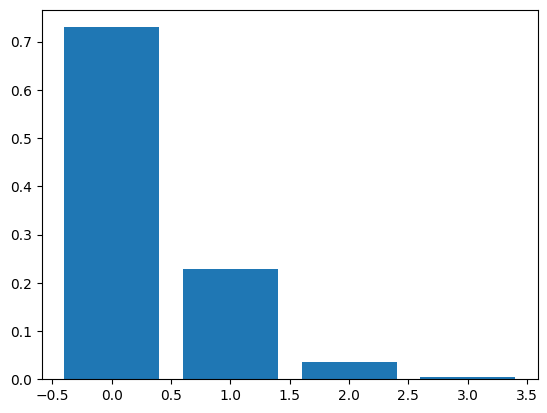

In [82]:
explained_variance = pca.explained_variance_ratio_
plt.bar(range(4), explained_variance)

In [58]:
# So sánh giá trị tuyệt đối của Z và X_pca
np.allclose(np.abs(Z), np.abs(X_pca))

True

Text(0.5, 1.0, 'PCA using sklearn')

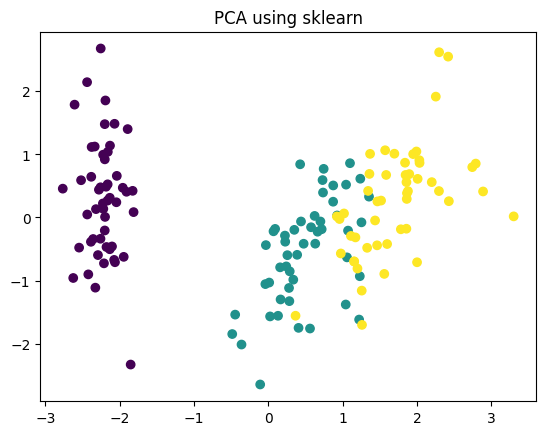

In [83]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['label'], cmap='viridis')
plt.title('PCA using sklearn')